<a href="https://colab.research.google.com/github/char26/scada-generator/blob/main/NetDiffusion-LoRa-SD3-Fine-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Dependencies

1. Installs the latest development version of Hugging Face's `diffusers` library directly from GitHub. This library is used for working with diffusion models such as Stable Diffusion.

2. Installs and upgrades several core Hugging Face and optimization libraries:
   - `transformers`: For using pre-trained language and vision models
   - `accelerate`: Simplifies training across CPUs, GPUs, and distributed setups
   - `wandb`: For logging experiments and visualizing training progress
   - `bitsandbytes`: Enables 8-bit model loading for memory-efficient inference/training
   - `peft`: For Parameter-Efficient Fine-Tuning of large models

3. Installs additional Python libraries needed for data handling, model input/output, and networking or computer vision tasks:
   - `pandas`: For data manipulation and tabular processing
   - `torchvision`: For image transformations and loading datasets (used with PyTorch)
   - `pyarrow`: For efficient I/O and working with Apache Arrow / Parquet formats
   - `sentencepiece`: For subword tokenization used in many NLP models
   - `controlnet_aux`: Adds support functions for ControlNet like HED, Canny, Depth, etc.
   - `scapy`: For packet parsing and crafting, often used in networking/PCAP analysis
   - `gdown`: For downloading files from Google Drive using file IDs
   - `opencv-python`: For computer vision tasks and image manipulation

In [1]:
!pip install -q -U git+https://github.com/huggingface/diffusers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
!pip install -q -U \
    transformers \
    accelerate \
    wandb \
    bitsandbytes \
    peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 117.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.4/556.4 kB 50.1 MB/s eta 0:00:00


In [3]:
!pip install pandas torchvision pyarrow sentencepiece controlnet_aux scapy gdown opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.7 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/noise-lab/NetDiffusion.git
!mv NetDiffusion/scripts scripts && rm -rf NetDiffusion/

Cloning into 'NetDiffusion'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 179 (delta 81), reused 123 (delta 49), pack-reused 0 (from 0)
Receiving objects: 100% (179/179), 5.00 MiB | 12.96 MiB/s, done.
Resolving deltas: 100% (81/81), done.


As SD3 is gated, before using it with diffusers you first need to go to the Stable Diffusion 3 Medium Hugging Face page, fill in the form and accept the gate. Once you are in, you need to log in so that your system knows you’ve accepted the gate. Use the command below to log in:
#Ignore if already logged in.

## Hugging Face Authentication

As SD3 is gated, you need to:
1. Go to the [Stable Diffusion 3 Medium Hugging Face page](https://huggingface.co/stabilityai/stable-diffusion-3-medium-diffusers)
2. Fill in the form and accept the gate
3. Log in to authenticate your access

Check if you're already logged in first:

In [5]:
# If not logged in, run this command and enter your token when prompted
!hf auth login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `scada-generator` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `scada-ge

In [6]:
# Test if shell commands work and show output
!echo "This should show output"
!pwd
!ls -la | head -5

This should show output
/content
total 20
drwxr-xr-x 1 root root 4096 Nov 15 22:36 .
drwxr-xr-x 1 root root 4096 Nov 15 22:21 ..
drwxr-xr-x 4 root root 4096 Nov 12 14:30 .config
drwxr-xr-x 1 root root 4096 Nov 12 14:30 sample_data


In [7]:
# Alternative: Use subprocess to capture output explicitly
import subprocess
import sys

def run_command(cmd):
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
    print(f"Command: {cmd}")
    print(f"Return code: {result.returncode}")
    if result.stdout:
        print(f"Output: {result.stdout}")
    if result.stderr:
        print(f"Error: {result.stderr}")

# Test with a simple command
run_command("echo 'Testing subprocess output'")

Command: echo 'Testing subprocess output'
Return code: 0
Output: Testing subprocess output



In [8]:
# Force output to show in VS Code
import sys
import os

# Test basic output
print("Python version:", sys.version)
print("Current directory:", os.getcwd())

# Test shell command with explicit flushing
import subprocess
result = subprocess.run(['echo', 'VS Code test'], capture_output=True, text=True)
print("Shell output:", result.stdout.strip())

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Current directory: /content
Shell output: VS Code test


## Download Example Dataset

Alternatively, create your own dataset:
1. Install nPrint in your environment (see https://nprint.github.io/nprint/)
2. Collect PCAPs belonging to the same service/application you plan to model
3. Convert each PCAP to an nPrint file with the following command:
   ```
   nprint -F -1 -P {pcap} -4 -i -6 -t -u -p 0 -c 1024 -W {output_file}
   ```
4. Place all resulting nPrint files in a folder named "nprint_traffic"

In [9]:
!sudo apt-get install libpcap-dev
!wget https://github.com/nprint/nprint/releases/download/v1.2.1/nprint-1.2.1.tar.gz
!tar -xvf nprint-1.2.1.tar.gz
!cd nprint-1.2.1 && ./configure && make && make install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libdbus-1-dev libpcap0.8 libpcap0.8-dev
The following NEW packages will be installed:
  libdbus-1-dev libpcap-dev libpcap0.8 libpcap0.8-dev
0 upgraded, 4 newly installed, 0 to remove and 41 not upgraded.
Need to get 607 kB of archives.
After this operation, 2,238 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap0.8 amd64 1.10.1-4ubuntu1.22.04.1 [145 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libdbus-1-dev amd64 1.12.20-2ubuntu4.1 [188 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap0.8-dev amd64 1.10.1-4ubuntu1.22.04.1 [270 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap-dev amd64 1.10.1-4ubuntu1.22.04.1 [3,326 B]
Fetched 607 kB in 1s (441 kB/s)
debconf: unable to initialize frontend: Dialog
deb

In [10]:
!mkdir pcaps
!mkdir nprint_traffic
!cd pcaps && wget https://github.com/antoine-lemay/Modbus_dataset/raw/master/CnC_uploading_exe_modbus_6RTU_with_operate.pcap

--2025-11-15 22:37:41--  https://github.com/antoine-lemay/Modbus_dataset/raw/master/CnC_uploading_exe_modbus_6RTU_with_operate.pcap
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/antoine-lemay/Modbus_dataset/master/CnC_uploading_exe_modbus_6RTU_with_operate.pcap [following]
--2025-11-15 22:37:41--  https://raw.githubusercontent.com/antoine-lemay/Modbus_dataset/master/CnC_uploading_exe_modbus_6RTU_with_operate.pcap
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 183387 (179K) [application/octet-stream]
Saving to: ‘CnC_uploading_exe_modbus_6RTU_with_operate.pcap’

CnC_uploading_exe_m 100%[=======

In [11]:
# !gdown --id 1vvneSH0a1WZFPHTafKusOUjNhg7oQioq --output preprocessed_dataset.zip
# !unzip -q preprocessed_dataset.zip
# !mkdir -p nprint_traffic
# !mv amazon_nprint_traffic/* nprint_traffic/
# !rm -r amazon_nprint_traffic/

In [11]:
!nprint -F -1 -P pcaps/CnC_uploading_exe_modbus_6RTU_with_operate.pcap -4 -i -6 -t -u -p 0 -c 1024 -W nprint_traffic/modbus.nprint

In [12]:
!ls nprint_traffic/

modbus.nprint


## Convert nPrint to PNG Images

This script transforms `.nprint` files—tabular feature representations of network packets—into fixed-size PNG images that can be used as input for SD fine-tuning.

**Input:** `.nprint` files generated from packet captures (PCAPs) using the nPrint tool. Each file is a CSV-like matrix where each row represents a single packet and columns correspond to extracted features.

**Preprocessing:**
- Drops IP address-related columns to avoid injecting identifiable or non-generalizable information into the model
- Maps integer values in the remaining columns to RGBA color tuples to visualize numeric features as colored pixels

**Padding:** Pads each image to a uniform height (default 1024) using a solid background to ensure model input consistency across varying packet counts.

**Output:** Saves a PNG file for each `.nprint` file, preserving the packet structure as a vertically stacked color-coded image (rows = packets, cols = features).

In [13]:
!python ./scripts/nprint_to_png.py -i ./nprint_traffic/ -o ./nprint_traffic_images

Processing modbus.nprint
/content/./scripts/nprint_to_png.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  np_df = np.array(df.applymap(np.array).to_numpy().tolist())
/content/./scripts/nprint_to_png.py:29: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(np_img, 'RGBA')


## Compute Embeddings

Generates text prompt embeddings via a Stable Diffusion 3 pipeline and T5 text encoder. Maps each local PNG image to a unique SHA-256 hash and associates it with the computed embeddings. Stores the resulting image-hash-to-embedding data in a .parquet file for further processing.

Here we are using the default instance prompt "pixelated network data for type-0 application traffic". You can configure this by referring to the compute_embeddings.py script for details on other supported arguments.

In [14]:
!python ./scripts/compute_embeddings.py

2025-11-15 22:38:19.813541: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-15 22:38:19.832291: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763246299.854547    5759 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763246299.861289    5759 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1763246299.878652    5759 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Compute embeddings:
* Generates text prompt embeddings via a Stable Diffusion 3 pipeline and T5 text encoder.
* Maps each local PNG image to a unique SHA-256 hash and associates it with the computed embeddings.
* Stores the resulting image-hash-to-embedding data in a .parquet file for further processing.
* Here we are using the default instance prompt "pixelated network data for type-0 application traffic".
* But you can configure this. Refer to the compute_embeddings.py script for details on other supported arguments.


## Train LoRA Adapter on Stable Diffusion 3 (Miniature Setup)

This command launches training using `accelerate` with DreamBooth-style LoRA tuning, optimized for quick experimentation or demo runs.

**⚠️ Current configuration uses:**
- Only 1 training step
- Small batch size
- No warmup
- High learning rate

**Intended only for testing or verifying training scripts**, NOT for quality results. For actual training, increase `max_train_steps`, adjust learning rate, and consider enabling full validation and saving checkpoints.

In [15]:
!accelerate launch ./scripts/train_dreambooth_lora_sd3_miniature.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-3-medium-diffusers"  \
  --instance_data_dir="nprint_traffic_images" \
  --data_df_path="sample_embeddings.parquet" \
  --output_dir="trained-sd3-lora-miniature" \
  --mixed_precision="fp16" \
  --instance_prompt="pixelated network data for type-0 application traffic" \
  --train_batch_size=2 \
  --gradient_accumulation_steps=1 --gradient_checkpointing \
  --use_8bit_adam \
  --learning_rate=5e-5 \
  --report_to="wandb" \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1 \
  --seed="0"

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2025-11-15 22:40:14.547260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-15 22:40:14.564668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763246414.585660    6501 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register 

## Inference Pipeline for SD3 + ControlNet + LoRA

This cell demonstrates the full generation process:
- Loads Stable Diffusion 3 Medium base model
- Loads ControlNet (Canny edge-based guidance)
- Loads LoRA weights fine-tuned on pixelated network traffic
- Applies edge-conditioned generation using a sample input

## Post-Generation Processing Pipeline

This cell performs a 3-stage transformation of the generated PNG images:

1. **Color Augmentation:** Applies standardized color shifts to improve nprint reconstruction accuracy
2. **Image-to-nPrint Conversion:** Converts augmented images back into nPrint-compatible feature format using a reference file to maintain consistent structure
3. **Heuristic Correction & PCAP Reconstruction:** Reconstructs valid and replayable PCAP files from the diffusion-generated nPrint representation

This pipeline enables turning synthetic traffic images back into replayable network traffic for evaluation or simulation.

Final PCAP files are stored in `replayable_generated_pcaps`

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


Displaying Canny control image:


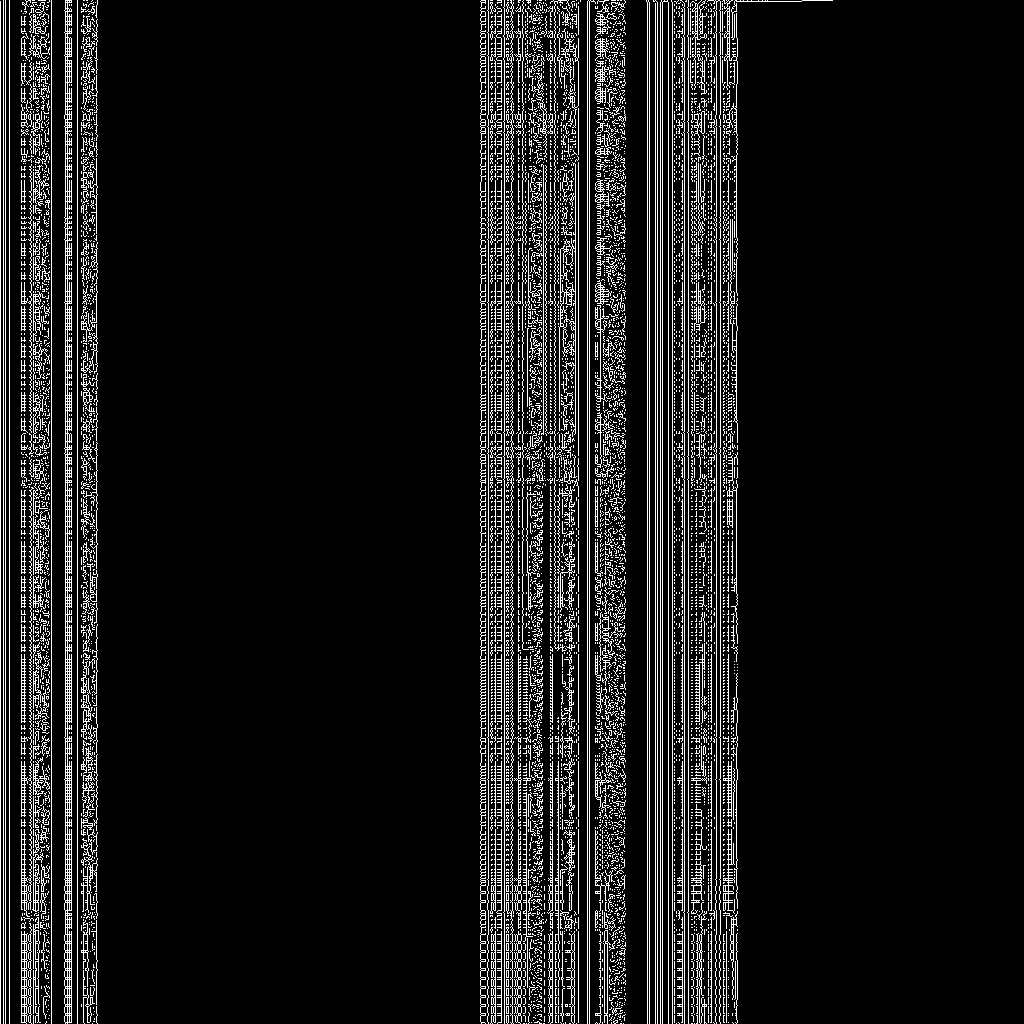

  0%|          | 0/20 [00:00<?, ?it/s]

Generated image saved to: generated_traffic_images/generated_traffic.png


In [21]:
# -----------------------------------------------------------
# 🎯 Inference Pipeline for SD3 + ControlNet + LoRA
#
# This cell demonstrates the full generation process:
#  - Loads Stable Diffusion 3 Medium base model
#  - Loads ControlNet (Canny edge-based guidance)
#  - Loads LoRA weights fine-tuned on pixelated network traffic
#  - Applies edge-conditioned generation using a sample input
#
# -----------------------------------------------------------
# flush()
import os
import torch
import cv2
from PIL import Image
from diffusers import StableDiffusion3ControlNetPipeline, SD3ControlNetModel
from diffusers.utils import load_image

# Make sure our output folder exists
os.makedirs("generated_traffic_images", exist_ok=True)

# Base SD 3.0 model
base_model_path = "stabilityai/stable-diffusion-3-medium-diffusers"

# Canny-based ControlNet
controlnet_path = "InstantX/SD3-Controlnet-Canny"

# Load the ControlNet and pipeline
controlnet = SD3ControlNetModel.from_pretrained(
    controlnet_path, torch_dtype=torch.float16
)
pipe = StableDiffusion3ControlNetPipeline.from_pretrained(
    base_model_path,
    controlnet=controlnet,
)

# Load LoRA weights
lora_output_path = "trained-sd3-lora-miniature"
pipe.load_lora_weights(lora_output_path)

# Move pipeline to GPU (half precision)
pipe.to("cuda", torch.float16)
pipe.enable_sequential_cpu_offload()

# ----------------------------------------------------
# 1) Convert original control image to Canny edges via OpenCV
# ----------------------------------------------------
orig_path = "./scripts/traffic_conditioning_image.png"
orig_bgr = cv2.imread(orig_path)
if orig_bgr is None:
    raise ValueError(f"Could not load file: {orig_path}")

# Convert to grayscale
gray = cv2.cvtColor(orig_bgr, cv2.COLOR_BGR2GRAY)

# Generate Canny edge map (tweak thresholds as needed)
edges = cv2.Canny(gray, 100, 200)

# Convert single-channel edge map to 3-channel RGB
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

# Convert to PIL for use in ControlNet pipeline
control_image = Image.fromarray(edges_rgb)
orig_width, orig_height = control_image.size
target_width = 1024
if orig_width > target_width:
    # (left, upper, right, lower)
    control_image = control_image.crop((0, 0, target_width, orig_height))

# print("Displaying Canny control image:")
# display(control_image)

# ----------------------------------------------------
# 3) Set up prompts and run pipeline
# ----------------------------------------------------
prompt = "pixelated network data for type-0 application traffic"
generator = torch.manual_seed(0)  # reproducibility

# Generate at 1024×1024 to match the new control image
image = pipe(
    prompt=prompt,
    num_inference_steps=20,
    generator=generator,
    height=1024,
    width=1088,
    control_image=control_image,
    controlnet_conditioning_scale=0.5,  # increase to adhere more strongly to edges
).images[0]

# ----------------------------------------------------
# 4) Save the generated image
# ----------------------------------------------------
output_path = os.path.join("generated_traffic_images", "generated_traffic.png")
image.save(output_path)
print(f"Generated image saved to: {output_path}")


In [22]:
# -----------------------------------------------------------
# 🔄 Post-Generation Processing Pipeline
#
# This cell performs a 3-stage transformation of the generated PNG images:
#   1. Applies color correction for standardization.
#   2. Converts augmented images back into nPrint-compatible feature format.
#   3. Applies heuristic corrections and reconstructs valid PCAP files.
#
# ⚙️ This pipeline enables turning synthetic traffic images
#    back into replayable network traffic for evaluation or simulation.
# -----------------------------------------------------------

# 🎨 Step 1: Color Augmentation
# Applies standardized color shifts to improve nprint reconstruction accuracy
!python ./scripts/color_processor.py \
  --input_dir="./generated_traffic_images" \
  --output_dir="./color_corrected_generated_traffic_images"
# -----------------------------------------------------------
# 🔁 Step 2: Image-to-nPrint Conversion
# Converts augmented PNG images back into `.nprint` tabular format.
#
# Uses a reference `.nprint` file to maintain consistent structure and column order.
# This step allows diffusion-generated visual traffic to be fed into analysis tools.
# -----------------------------------------------------------
!python ./scripts/image_to_nprint.py \
  --org_nprint ./scripts/column_example.nprint \
  --input_dir ./color_corrected_generated_traffic_images \
  --output_dir ./generated_nprint
# -----------------------------------------------------------
# 🧠 Step 3: Heuristic Correction & PCAP Reconstruction
#
# This step reconstructs a valid and replayable `.pcap` file
# from the diffusion-generated `.nprint` representation.
# 🔍 Core Functionalities:
# ✅ Intra-packet corrections (fixes within individual packets).
# 🔁 Inter-packet dependency enforcement.
# 🔧 Reconstruction:
#   - Save the corrected `.nprint` to disk
#   - Call `nprint -W` to convert `.nprint` into `.pcap` using external tool
#   - Run Scapy-based checksum updates to ensure IPv4 validity
#   - Reconvert final `.pcap` back to `.nprint` (with fixed layout) for downstream tasks
# -----------------------------------------------------------
!python ./scripts/mass_reconstruction.py \
  --input_dir ./generated_nprint \
  --output_pcap_dir ./replayable_generated_pcaps \
  --output_nprint_dir ./replayable_generated_nprints \
  --formatted_nprint_path ./scripts/correct_format.nprint
# Final Pcap is stored in replayable_generated_pcaps

Processed 1 images.
Processing ./color_corrected_generated_traffic_images/generated_traffic.png with size 1088 x 1024
Saved ./generated_nprint/generated_traffic.nprint
Done! Converted 1 .png files into .nprint format.

Processing: ./generated_nprint/generated_traffic.nprint -> ./replayable_generated_pcaps/generated_traffic.pcap
Running command:
  python3 ./scripts/reconstruction.py --generated_nprint_path './generated_nprint/generated_traffic.nprint' --formatted_nprint_path './scripts/correct_format.nprint' --output './replayable_generated_pcaps/generated_traffic.pcap' --nprint './replayable_generated_nprints/generated_traffic.nprint'
/content/./scripts/reconstruction.py:74: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.238.123.173' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  generated_nprint.at[idx, 'src_ip'] = implementing_src_ip
tcp
Success! Created ./re